# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np

## Import data

In [ ]:
original=pd.read_csv('https://raw.githubusercontent.com/loctv1705/project_nmkhdl/main/house_description.csv')
description_llm=pd.read_csv('https://raw.githubusercontent.com/loctv1705/project_nmkhdl/main/description_llm.csv')

In [ ]:
description_llm

,district,price,area,bedroom,bathroom,facade,nearhospital,nearschool,nearsupermarket,nearuniversity,nearbuildings,urgent,floor
0,Huyện Nhà Bè,30.0,150.0,2.0,1.0,TRUE,NaN,NaN,NaN,NaN,NaN,True,NaN
1,Tân Bình,5.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,Phú Nhuan,4.0,45.0,2.0,2.0,TRUE,True,NaN,True,NaN,NaN,NaN,2.0
3,Quận 5,NaN,41.0,NaN,NaN,TRUE,NaN,NaN,NaN,NaN,NaN,True,2.0
4,Tân Phú,5.0,96.0,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,4.0,30.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4996,Thủ Đức,3.0,100.0,2.0,2.0,True,NaN,True,True,NaN,NaN,NaN,NaN
4997,Gò Vấp,4.5,34.0,2.0,2.0,True,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
description_llm.iloc[:,5:]

,facade,nearhospital,nearschool,nearsupermarket,nearuniversity,nearbuildings,urgent,floor
0,TRUE,NaN,NaN,NaN,NaN,NaN,True,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,TRUE,True,NaN,True,NaN,NaN,NaN,2.0
3,TRUE,NaN,NaN,NaN,NaN,NaN,True,2.0
4,NaN,NaN,True,NaN,True,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4996,True,NaN,True,True,NaN,NaN,NaN,NaN
4997,True,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Thêm vào bộ original những cột thuộc tính của description_llm mà original không có và xóa cột description_title
original=pd.concat([original,description_llm.iloc[:,5:]],axis=1)
original.drop('description_title',axis=1,inplace=True)

In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5000 non-null   float64
 1   area             4459 non-null   float64
 2   bedroom          2992 non-null   float64
 3   bathroom         2754 non-null   float64
 4   address          2467 non-null   object 
 5   facade           2952 non-null   object 
 6   nearhospital     770 non-null    object 
 7   nearschool       1135 non-null   object 
 8   nearsupermarket  1415 non-null   object 
 9   nearuniversity   443 non-null    object 
 10  nearbuildings    545 non-null    object 
 11  urgent           1564 non-null   object 
 12  floor            4229 non-null   object 
dtypes: float64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
original.head(20)

,price,area,bedroom,bathroom,address,facade,nearhospital,nearschool,nearsupermarket,nearuniversity,nearbuildings,urgent,floor
0,3.899000e+09,150.0,2.0,1.0,THÀNH PHỐ HỒ CHÍ MINH,TRUE,NaN,NaN,NaN,NaN,NaN,True,NaN
1,5.500000e+00,51.0,NaN,NaN,ÂU CƠ PHƯỜNG 9 TÂN BÌNH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,4.600000e+00,45.0,2.0,2.0,NaN,TRUE,True,NaN,True,NaN,NaN,NaN,2.0
3,7.350000e+00,41.0,NaN,NaN,LÊ HỒNG PHONG PHƯỜNG 2 QUẬN 5,TRUE,NaN,NaN,NaN,NaN,NaN,True,2.0
4,0.000000e+00,96.0,2.0,1.0,NaN,NaN,NaN,True,NaN,True,NaN,NaN,2.0
5,0.000000e+00,NaN,3.0,3.0,NaN,TRUE,NaN,NaN,True,NaN,NaN,True,3.0
6,1.900000e+01,180.0,NaN,NaN,"ĐƯỜNG KHA VẠN CÂN, PHƯỜNG LINH ĐÔNG, QUẬN THỦ ...",TRUE,NaN,NaN,NaN,True,True,True,NaN
7,2.180000e+01,80.0,8.0,8.0,THÀNH PHỐ HỒ CHÍ MINH,TRUE,NaN,NaN,NaN,NaN,NaN,NaN,5.0
8,4.000000e+00,33.0,3.0,3.0,NaN,TRUE,True,NaN,NaN,NaN,NaN,NaN,3.0
9,1.900000e+01,118.0,NaN,NaN,"ĐƯỜNG PHẠM VĂN ĐỒNG, PHƯỜNG HIỆP BÌNH CHÁNH, Q...",TRUE,NaN,NaN,True,NaN,NaN,NaN,NaN


In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5000 non-null   float64
 1   area             4459 non-null   float64
 2   bedroom          2992 non-null   float64
 3   bathroom         2754 non-null   float64
 4   address          2467 non-null   object 
 5   facade           2952 non-null   object 
 6   nearhospital     770 non-null    object 
 7   nearschool       1135 non-null   object 
 8   nearsupermarket  1415 non-null   object 
 9   nearuniversity   443 non-null    object 
 10  nearbuildings    545 non-null    object 
 11  urgent           1564 non-null   object 
 12  floor            4229 non-null   object 
dtypes: float64(4), object(9)
memory usage: 507.9+ KB


### Clean data

#### Price

In [ ]:
original['price'].unique()

array([3.899000e+09, 5.500000e+00, 4.600000e+00, 7.350000e+00,
       0.000000e+00, 1.900000e+01, 2.180000e+01, 4.000000e+00,
       1.280000e+01, 3.400000e+00, 8.990000e+00, 7.390000e+00,
       1.600000e+01, 4.750000e+00, 9.390000e+00, 1.580000e+01,
       6.100000e+00, 5.750000e+00, 4.690000e+00, 8.300000e+00,
       1.450000e+01, 1.520000e+01, 1.300000e+01, 2.500000e+01,
       3.350000e+00, 9.900000e+00, 2.950000e+00, 7.400000e+00,
       1.400000e+01, 5.100000e+09, 9.700000e+00, 4.550000e+00,
       8.600000e+00, 4.300000e+09, 1.090000e+01, 1.350000e+01,
       4.900000e+00, 4.700000e+00, 6.250000e+00, 5.000000e+00,
       7.500000e+00, 5.380000e+00, 9.300000e+00, 9.000000e+00,
       4.300000e+00, 1.550000e+01, 8.900000e+00, 5.700000e+00,
       7.000000e+00, 8.500000e+01, 5.780000e+00, 2.400000e+00,
       2.500000e-02, 2.500000e+00, 6.600000e+00, 6.500000e+00,
       2.250000e+03, 4.850000e+00, 3.500000e+00, 5.800000e+00,
       2.850000e+01, 1.738000e+01, 8.710000e+00, 5.9000

In [ ]:
less_than_one = [i for i in original['price'] if 0 < i < 1]
units = [i for i in original['price'] if 1 < i < 1000]
thousands = [i for i in original['price'] if 1000 < i < 1000000]
millions = [i for i in original['price'] if 1000000 < i < 1000000000]
billions = [i for i in original['price'] if i >= 1000000000]

print(less_than_one)
print(units)
print(thousands)
print(millions)
print(billions)

print(len(less_than_one))
print(len(units))
print(len(thousands))
print(len(millions))
print(len(billions))

[0.025, 0.025, 0.012, 0.095, 0.03, 0.012, 0.012, 0.012, 0.85, 0.002, 0.002, 0.012, 0.012, 0.003, 0.01211, 0.26, 0.322, 0.003, 0.01163, 0.276, 0.276, 0.02, 0.0052, 0.00758, 0.945, 0.55, 0.5, 0.55, 0.015, 0.57, 0.68, 0.53, 0.65, 0.68, 0.623, 0.6, 0.105, 0.53, 0.0625, 0.028, 0.69, 0.65, 0.06, 0.76, 0.79, 0.85, 0.53, 0.56, 0.079, 0.535, 0.69, 0.62, 0.05, 0.65, 0.158, 0.54, 0.43, 0.266, 0.465, 0.115, 0.8, 0.465, 0.65, 0.85, 0.55, 0.218, 0.55, 0.5, 0.545, 0.67, 0.7, 0.55, 0.75, 0.68, 0.95, 0.66, 0.0065, 0.72, 0.65, 0.62, 0.45, 0.62, 0.75, 0.45, 0.51, 0.51, 0.455, 0.85, 0.6, 0.01, 0.55, 0.5]
[5.5, 4.6, 7.35, 19.0, 21.8, 4.0, 19.0, 12.8, 3.4, 8.99, 7.39, 16.0, 4.75, 5.5, 9.39, 15.8, 6.1, 5.75, 5.5, 4.69, 8.3, 14.5, 15.2, 13.0, 25.0, 25.0, 3.35, 9.9, 2.95, 7.4, 14.0, 5.75, 9.7, 4.55, 16.0, 3.35, 8.6, 8.6, 10.9, 13.5, 4.9, 4.7, 6.25, 5.0, 7.5, 5.38, 9.3, 9.0, 4.3, 15.5, 8.9, 5.7, 3.4, 3.4, 7.0, 85.0, 6.1, 6.1, 6.1, 5.78, 2.4, 2.5, 6.6, 6.5, 4.85, 4.6, 3.5, 5.5, 4.0, 4.0, 5.5, 5.5, 5.8, 28.5, 17.

In [ ]:
index_less_than_one_o = [i for i in original.index if 0 < original.loc[i, 'price'] < 1]
index_units_o = [i for i in original.index if 1 < original.loc[i, 'price'] < 1000]
index_thousands_o = [i for i in original.index if 1000 < original.loc[i, 'price'] < 1000000]
index_millions_o = [i for i in original.index if 1000000 < original.loc[i, 'price'] < 1000000000]
index_billions_o = [i for i in original.index if original.loc[i, 'price'] >= 1000000000]

print(index_less_than_one_o)
print(index_units_o)
print(index_thousands_o)
print(index_millions_o)
print(index_billions_o)

[73, 74, 132, 288, 324, 408, 409, 470, 498, 729, 730, 762, 763, 923, 955, 1106, 1107, 1174, 1370, 1394, 1395, 1656, 1817, 1970, 2244, 2654, 2695, 2735, 2810, 2811, 2936, 3074, 3131, 3153, 3192, 3228, 3294, 3339, 3365, 3388, 3389, 3415, 3424, 3426, 3435, 3512, 3515, 3517, 3539, 3561, 3569, 3593, 3620, 3644, 3660, 3667, 3670, 3689, 3702, 3716, 3731, 3734, 3740, 3788, 3801, 3818, 3841, 3843, 3844, 3892, 3897, 3918, 3965, 4041, 4057, 4131, 4163, 4171, 4235, 4263, 4325, 4347, 4388, 4409, 4470, 4491, 4539, 4567, 4620, 4680, 4742, 4923]
[1, 2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 41, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 76, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129

In [ ]:
# Xử lý miền giá trị trong tập original
# Không xử lý những giá trị bé hơn 1 vì trong tập hợp này có những căn nhà cho thuê bị lẫn vào nên do dù có xử lý cũng không phù hợp yêu cầu là dự đoán giá nhà BÁN
# Do thông tin giá nhà được đăng trên trang bị lỗi giá trị. VD: 7.9 tỷ, thì giá đăng là 7900000000 tỷ
# Xử lý những giá từ 1,000->1,000,000
original['price'][index_thousands_o]=original['price'][index_thousands_o]/1e3
# Xử lý những giá từ 1,000,000->1,000,000,000
original['price'][index_millions_o]=original['price'][index_millions_o]/1e6
# Xử lý những giá lớn 1,000,000,000
original['price'][index_billions_o]=original['price'][index_billions_o]/1e9

<ipython-input-996-7d878f520e3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['price'][index_thousands_o]=original['price'][index_thousands_o]/1e3
<ipython-input-996-7d878f520e3b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['price'][index_millions_o]=original['price'][index_millions_o]/1e6
<ipython-input-996-7d878f520e3b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['price'][index_billions_o]=ori

In [ ]:
index_thousands_after_o = [i for i in original.index if 1000 < original.loc[i, 'price'] < 1000000]
index_millions_after_o = [i for i in original.index if 1000000 < original.loc[i, 'price'] < 1000000000]
index_billions_after_o = [i for i in original.index if original.loc[i, 'price'] >= 1000000000]

print(index_thousands_after_o)
print(index_millions_after_o)
print(index_billions_after_o)

[4313]
[]
[]


In [ ]:
description_llm['price'].unique()

array(['30.0', '5.0', '4.0', nan, '3.5', '19.0', '21.68', '23.5',
       '3260000.0', '12.8', '3.4', '1.0', '8.99', '7.39', '16.0', '9.39',
       '15.8', '6.1', '4.69', '8.3', '14.5', '15.2', '13.0', '25.0',
       '3.35', '9.9', '2.95', '7.0', '14.0', '4000000.0', '4.6', '9.7',
       '4.55', '8.6', '10.9', '13.5', '4.9', '4.7', '6.25', '7.5', '5.38',
       '9.0', '15.5', '8.9', '5.7', '2.4', '2.0', '6.6', '6.5',
       '2750000.0', '2250000000.0', '4.85', '5.5', '28.5', '8.71', '5.9',
       '5.48', '12.0', '16680000000.0', '4680.0', '5.8', '3.65', '3.7',
       '6.0', '14.8', '4.2', '3.3', '5.2', '3.8', '100000000.0', '3.29',
       '5.1', '1.6', '4.8', '3.0', '18.5', '6.4', '4.5', '12.5', '22.0',
       '5000000000.0', '4310000.0', '10.5', '8.5', '6.8', '4.35', '4.4',
       '22.5', '11.5', '9.6', '400000000.0', '2.6', '9.8', '12.99', '7.2',
       '2.98', '6.3', '13.6', '600.0', '11.0', '3780.0', '4850000000.0',
       '3.33', '3.9', '37.0', '4200000000.0', '2.7', '1.9', '3.15',

In [ ]:
for i,value in enumerate(description_llm['price']):
  try:
    description_llm.loc[i,'price']=pd.to_numeric(value)
  except ValueError:
    continue

# Convert nan and string to -1
for i, price in enumerate(description_llm['price']):
    if (pd.isna(price)):
        description_llm.loc[i, 'price'] = -1.0
    elif (isinstance(description_llm.loc[i, 'price'], str)):
        description_llm.loc[i, 'price'] = -1.0

In [ ]:
less_than_one_d = [i for i in description_llm['price'] if  i < 1]
units_d = [i for i in description_llm['price'] if 1 < i < 1000]
thousands_d = [i for i in description_llm['price'] if 1000 < i < 1000000]
millions_d = [i for i in description_llm['price'] if 1000000 < i < 1000000000]
billions_d = [i for i in description_llm['price'] if i >= 1000000000]

print(less_than_one_d)
print(units_d)
print(thousands_d)
print(millions_d)
print(billions_d)

print(len(less_than_one_d))
print(len(units_d))
print(len(thousands_d))
print(len(millions_d))
print(len(billions_d))

[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.

In [ ]:
index_less_than_one_d = [i for i in description_llm.index if  description_llm.loc[i, 'price'] < 1]
index_units_d = [i for i in description_llm.index if 1 < description_llm.loc[i, 'price'] < 1000]
index_thousands_d = [i for i in description_llm.index if 1000 < description_llm.loc[i, 'price'] < 1000000]
index_millions_d = [i for i in description_llm.index if 1000000 < description_llm.loc[i, 'price'] < 1000000000]
index_billions_d = [i for i in description_llm.index if description_llm.loc[i, 'price'] >= 1000000000]

print(index_less_than_one_d)
print(index_units_d)
print(index_thousands_d)
print(index_millions_d)
print(index_billions_d)

[3, 23, 28, 47, 50, 57, 59, 60, 67, 71, 82, 90, 106, 111, 112, 115, 122, 123, 159, 171, 201, 209, 210, 255, 262, 278, 285, 290, 292, 311, 327, 329, 377, 378, 400, 408, 409, 421, 433, 435, 450, 451, 452, 454, 462, 470, 475, 476, 483, 499, 535, 553, 557, 567, 572, 576, 593, 597, 631, 633, 677, 718, 723, 741, 743, 755, 758, 762, 763, 777, 795, 799, 821, 836, 842, 923, 925, 955, 977, 992, 1000, 1001, 1045, 1052, 1053, 1091, 1103, 1154, 1160, 1161, 1167, 1177, 1191, 1195, 1197, 1204, 1224, 1235, 1280, 1283, 1298, 1309, 1316, 1332, 1337, 1340, 1355, 1359, 1360, 1370, 1373, 1375, 1382, 1394, 1395, 1397, 1404, 1410, 1420, 1427, 1428, 1438, 1439, 1457, 1478, 1485, 1582, 1635, 1657, 1664, 1665, 1672, 1718, 1719, 1730, 1745, 1749, 1755, 1778, 1846, 1863, 1866, 1873, 1878, 1879, 1880, 1882, 1906, 1914, 1923, 1924, 1933, 1936, 1958, 1963, 1967, 1973, 1981, 2020, 2022, 2023, 2031, 2065, 2090, 2095, 2096, 2099, 2113, 2128, 2177, 2207, 2208, 2223, 2228, 2232, 2246, 2260, 2284, 2305, 2309, 2329, 2334, 

In [ ]:
# Xử lý miền giá trị trong tập description
# Không xử lý những giá trị bé hơn 1 vì trong tập hợp này có những căn nhà cho thuê bị lẫn vào nên do dù có xử lý cũng không phù hợp yêu cầu là dự đoán giá nhà BÁN
# Do thông tin giá nhà được đăng trên trang bị lỗi giá trị. VD: 7.9 tỷ, thì giá đăng là 7900000000 tỷ
# Xử lý những giá từ 1,000->1,000,000
description_llm['price'][index_thousands_d]=description_llm['price'][index_thousands_d]/1e3
# Xử lý những giá từ 1,000,000->1,000,000,000
description_llm['price'][index_millions_d]=description_llm['price'][index_millions_d]/1e6
# Xử lý những giá lớn 1,000,000,000
description_llm['price'][index_billions_d]=description_llm['price'][index_billions_d]/1e9

In [ ]:
index_thousands_after = [i for i in description_llm.index if 1000 < description_llm.loc[i, 'price'] < 1000000]
index_millions_after = [i for i in description_llm.index if 1000000 < description_llm.loc[i, 'price'] < 1000000000]
index_billions_after = [i for i in description_llm.index if description_llm.loc[i, 'price'] >= 1000000000]

print(index_thousands_after)
print(index_millions_after)
print(index_billions_after)

[]
[]
[]


In [ ]:
# Xử lý những giá trị bằng 0.0 trong tập original
# Sẽ có hai khả năng, tại vị trí đó trong tập description_llm có giá trị và không có giá trị (trường hợp này giá trị là -1.0 và xóa sau)
for i, price in enumerate(original['price']):
    if (price == 0.0):
      original.loc[i, 'price'] = description_llm.loc[i, 'price']

In [ ]:
# đổi giá của những hàng có giá bé hơn 1 thành -1.0 để xóa sau khi đã xử lý
original.loc[index_less_than_one_o, 'price'] = -1.0

In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5000 non-null   float64
 1   area             4459 non-null   float64
 2   bedroom          2992 non-null   float64
 3   bathroom         2754 non-null   float64
 4   address          2467 non-null   object 
 5   facade           2952 non-null   object 
 6   nearhospital     770 non-null    object 
 7   nearschool       1135 non-null   object 
 8   nearsupermarket  1415 non-null   object 
 9   nearuniversity   443 non-null    object 
 10  nearbuildings    545 non-null    object 
 11  urgent           1564 non-null   object 
 12  floor            4229 non-null   object 
dtypes: float64(4), object(9)
memory usage: 507.9+ KB


#### Area

##### Unify data type (float) in original

In [ ]:
description_llm.area.unique()

array(['150.0', '51.0', '45.0', '41.0', '96.0', '91.0', '180.0', '80.0',
       '33.0', '118.0', nan, '75.0', '105.0', '24.0', '85.0', '53.0',
       '50.0', '40.0', '57.0', '55.0', '35.0', '31.0', '71.5', '215.0',
       '50.72', '94.0', '227.0', '60.0', '48.0', '58.0', '52.0', '300.0',
       '42.0', '88.0', '121.0', '220.6', '61.0', '400.0', '82.0', '36.5',
       '72.0', '65.0', '67.5', '28.0', '64.0', '18.0', '66.0', '62.0',
       '100.0', '147.0', '83.25', '43.0', '120.0', '37.0', '26.0', '68.0',
       '101.0', '95.0', '49.0', '6.0', '36.0', '89.0', '4.0', '178.0',
       '107.0', '46.0', '129.0', '376.45', '90.0', '132.0', '44.0',
       '56.0', '54.0', '268.0', '74.0', '76.0', '254.0', '184.0', '84.0',
       '34.0', '98.0', '4.4', '67.0', '59.0', '70.0', '45.48', '122.6',
       '48.2', '346.0', '41.35', '41.8', '182.46', '173.8', '22.0',
       '93.0', '1.98', '160.0', '240.0', '51.55', '202.7', '66.4', '62.4',
       '14.0', '4422.0', '208.0', '115.0', '224.0', '78.0', '63

In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5000 non-null   float64
 1   area             4459 non-null   float64
 2   bedroom          2992 non-null   float64
 3   bathroom         2754 non-null   float64
 4   address          2467 non-null   object 
 5   facade           2952 non-null   object 
 6   nearhospital     770 non-null    object 
 7   nearschool       1135 non-null   object 
 8   nearsupermarket  1415 non-null   object 
 9   nearuniversity   443 non-null    object 
 10  nearbuildings    545 non-null    object 
 11  urgent           1564 non-null   object 
 12  floor            4229 non-null   object 
dtypes: float64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
# Convert area to numeric in 'description_llm'
for i, area in enumerate(description_llm['area']):
    try:
       description_llm.loc[i, 'area'] = float(area)
    except ValueError:
        continue

# Convert nan and string to -1
for i, area in enumerate(description_llm['area']):
    if (pd.isna(area)):
        description_llm.loc[i, 'area'] = -1.0
    elif (isinstance(description_llm.loc[i, 'area'], str)):
        description_llm.loc[i, 'area'] = -1.0

# Convert description_llm['area'] to float to ensure
# this attribute is of type float
description_llm['area'] = description_llm['area'].astype(float)

In [ ]:
description_llm['area'].unique()

array([ 1.50000e+02,  5.10000e+01,  4.50000e+01,  4.10000e+01,
        9.60000e+01,  9.10000e+01,  1.80000e+02,  8.00000e+01,
        3.30000e+01,  1.18000e+02, -1.00000e+00,  7.50000e+01,
        1.05000e+02,  2.40000e+01,  8.50000e+01,  5.30000e+01,
        5.00000e+01,  4.00000e+01,  5.70000e+01,  5.50000e+01,
        3.50000e+01,  3.10000e+01,  7.15000e+01,  2.15000e+02,
        5.07200e+01,  9.40000e+01,  2.27000e+02,  6.00000e+01,
        4.80000e+01,  5.80000e+01,  5.20000e+01,  3.00000e+02,
        4.20000e+01,  8.80000e+01,  1.21000e+02,  2.20600e+02,
        6.10000e+01,  4.00000e+02,  8.20000e+01,  3.65000e+01,
        7.20000e+01,  6.50000e+01,  6.75000e+01,  2.80000e+01,
        6.40000e+01,  1.80000e+01,  6.60000e+01,  6.20000e+01,
        1.00000e+02,  1.47000e+02,  8.32500e+01,  4.30000e+01,
        1.20000e+02,  3.70000e+01,  2.60000e+01,  6.80000e+01,
        1.01000e+02,  9.50000e+01,  4.90000e+01,  6.00000e+00,
        3.60000e+01,  8.90000e+01,  4.00000e+00,  1.780

In [ ]:
# Convert area to numeric in 'original'
import math
original['area'] = pd.to_numeric(original['area'], errors='ignore')

# Convert nan to -1
for i, area in enumerate(original['area']):
    if (math.isnan(original.loc[i, 'area'])):
        original.loc[i, 'area'] = -1.0

In [ ]:
original.area.unique()

array([ 1.50000e+02,  5.10000e+01,  4.50000e+01,  4.10000e+01,
        9.60000e+01, -1.00000e+00,  1.80000e+02,  8.00000e+01,
        3.30000e+01,  1.18000e+02,  7.50000e+01,  1.10000e+02,
        1.20000e+01,  8.50000e+01,  5.30000e+01,  5.00000e+01,
        5.70000e+01,  5.50000e+01,  3.50000e+01,  3.10000e+01,
        7.10000e+01,  2.15000e+02,  9.40000e+01,  3.60000e+01,
        2.27000e+02,  4.80000e+01,  6.00000e+01,  5.80000e+01,
        3.00000e+02,  5.60000e+01,  4.20000e+01,  4.40000e+01,
        1.21000e+02,  4.00000e+01,  2.20000e+02,  6.10000e+01,
        4.42000e+02,  8.20000e+01,  3.70000e+01,  6.50000e+01,
        6.80000e+01,  2.80000e+01,  6.30000e+01,  6.60000e+01,
        1.00000e+02,  1.47000e+02,  7.20000e+01,  9.80000e+01,
        5.20000e+01,  2.20000e+01,  2.60000e+01,  1.01000e+02,
        9.50000e+01,  4.90000e+01,  3.00000e+01,  7.40000e+01,
        8.90000e+01,  6.40000e+01,  1.78000e+02,  4.60000e+01,
        1.29000e+02,  4.00000e+02,  3.76000e+02,  1.320

##### Adding missing values to area

In [ ]:
# Count numbers of -1.0 in area
count = 0
for i in original['area']:
    if i == -1.0:
        count += 1

count

541

In [ ]:
# Thay những ô bị thiếu trong 'original' bằng các giá trị trong 'description_llm'
for i, area in enumerate(original['area']):
    if area == -1.0:
        original.loc[i, 'area'] = description_llm.loc[i, 'area']

In [ ]:
# Count numbers of 0 in area
count = 0
for i in original['area']:
    if i == -1.0:
        count += 1

count

127

#### Bedroom and Bathroom

In [ ]:
# Xử lý cột 'bedroom' và 'bathroom
print(original['bedroom'].unique())
print(original['bathroom'].unique())

[  2.  nan   3.   8.   5.   7.   4.   6.   1.  14.  12.  28.   9.  24.
  11.  45.  13.  10.  26.  16.  20.  36.  18. 127.  15.  38.  44.  22.]
[  1.  nan   2.   3.   8.   6.   4.   5.  14.   7.  15.  12.  24.  11.
  48.   9.  13.  10.  28.  16.  20.  36.  18. 127.  22.  38.  26.  19.]


In [ ]:
# Những giá trị null trong tập original thì được thay bằng giá trị tương ứng trong tập description_llm
# Khi giá trị trong cả 2 tập đều không có thì ta để mặc định là 1.
for feat in ['bedroom','bathroom']:
  for i,value in enumerate(original[feat]):
    if pd.isna(value) and pd.isna(description_llm[feat][i])==False:
      original.loc[i,feat]=description_llm.loc[i,feat]
    if pd.isna(value) and pd.isna(description_llm[feat][i]):
      original.loc[i,feat]=1.0

In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5000 non-null   float64
 1   area             5000 non-null   float64
 2   bedroom          5000 non-null   object 
 3   bathroom         5000 non-null   object 
 4   address          2467 non-null   object 
 5   facade           2952 non-null   object 
 6   nearhospital     770 non-null    object 
 7   nearschool       1135 non-null   object 
 8   nearsupermarket  1415 non-null   object 
 9   nearuniversity   443 non-null    object 
 10  nearbuildings    545 non-null    object 
 11  urgent           1564 non-null   object 
 12  floor            4229 non-null   object 
dtypes: float64(2), object(11)
memory usage: 507.9+ KB


#### Facade

In [ ]:
# Xử lý cột 'facade'
original['facade'].unique()

array(['TRUE', nan, 'FALSE', '4.2', '5', 'True', 'False', '6', '13.5',
       '5.5', '4.0', '3', '4', '[None, None, None, None]', '4.1', '8.0',
       '4.5', '4.7', '4.9', '6.0', '14.0', '12.0'], dtype=object)

In [ ]:
# Các giá trị số thể hiện khoảng cách đến mặt tiền hoặc là độ dài mặt tiền, nên ta để những giá trị này là 1.0
# Những giá trị được để trong '[]' ta để là -1.0 và sẽ xóa những quan sát này vì nó là thông tin của gồm nhiều nhà khác nhau trong một mô tả, gây nhiễu cho bộ dữ liệu
# Những giá trị 'True' ta để là 1.0 và 'False' ta để là 0.0
def convert_value(val):
    if isinstance(val, str):
        if val in ['TRUE', 'True']:
            return 1.0
        try:
            float_val = float(val)
            return 1.0
        except ValueError:
            pass
        if val.startswith('[') and val.endswith(']'):
            return -1.0
    return 0.0
for i, value in enumerate(original['facade']):
    original.loc[i, 'facade'] = convert_value(value)
original['facade']=original['facade'].astype('float64')

In [ ]:
original['facade'].unique()

array([ 1.,  0., -1.])

#### Nearhospital, Nearschool, Nearsupermarket, Nearuniversity, Nearbuildings,Urgent

In [ ]:
# Xử lý các cột 'nearhospital','nearschool','nearsupermarket','nearuniversity','nearbuildings','urgent'.
# thay các giá trị khác true thành false, true vẫn giữ nguyên và đổi kiểu dữ liệu thành boolean
columns=['nearhospital','nearschool','nearsupermarket','nearuniversity','nearbuildings','urgent']
def replace_values(value):
    if value == 'True':
        return 1.0
    elif isinstance(value, str) and (value.startswith('[') and value.endswith(']')):
        return -1.0
    else:
        return 0.0

for col in columns:
    original[col] = original[col].apply(replace_values)

In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5000 non-null   float64
 1   area             5000 non-null   float64
 2   bedroom          5000 non-null   object 
 3   bathroom         5000 non-null   object 
 4   address          2467 non-null   object 
 5   facade           5000 non-null   float64
 6   nearhospital     5000 non-null   float64
 7   nearschool       5000 non-null   float64
 8   nearsupermarket  5000 non-null   float64
 9   nearuniversity   5000 non-null   float64
 10  nearbuildings    5000 non-null   float64
 11  urgent           5000 non-null   float64
 12  floor            4229 non-null   object 
dtypes: float64(9), object(4)
memory usage: 507.9+ KB


#### Floor

In [ ]:
original['floor'].unique()

array([nan, '3.0', '2.0', '5.0', '4.0', '1.0', '7.0', '6.0', '10.0',
       '1.5', '12.0', '8.0', '9.0', '2.5', '3', '5', '4', '2', '6',
       '[None, None, None, None]', '7', '1', '9', '8', '[4, 4]'],
      dtype=object)

In [ ]:
# thay các giá trị '[]' bằng -1.0 để xóa
def replace_bracket_with_zero(x):
    return -1 if pd.notnull(x) and '[' in str(x) else x
# Apply the function to the DataFrame
original = original.applymap(replace_bracket_with_zero)

In [ ]:
#còn lại chuyển về 1
# Convert 'floor' column to numeric, forcing errors to NaN
original['floor'] = pd.to_numeric(original['floor'], errors='coerce')
# Replace NaN values with 1
original['floor'].fillna(1, inplace=True)

In [ ]:
original.floor.unique()

array([ 1. ,  3. ,  2. ,  5. ,  4. ,  7. ,  6. , 10. ,  1.5, 12. ,  8. ,
        9. ,  2.5, -1. ])

In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5000 non-null   float64
 1   area             5000 non-null   float64
 2   bedroom          5000 non-null   object 
 3   bathroom         5000 non-null   object 
 4   address          2467 non-null   object 
 5   facade           5000 non-null   float64
 6   nearhospital     5000 non-null   float64
 7   nearschool       5000 non-null   float64
 8   nearsupermarket  5000 non-null   float64
 9   nearuniversity   5000 non-null   float64
 10  nearbuildings    5000 non-null   float64
 11  urgent           5000 non-null   float64
 12  floor            5000 non-null   float64
dtypes: float64(10), object(3)
memory usage: 507.9+ KB


#### Address

In [ ]:
address_district = pd.DataFrame({'address': original['address'], 'district': description_llm['district']})

In [ ]:
# chuyển cột quận thành list với kiểu dữ liệu str
districtstr = [str(x) for x in address_district['district']]

In [ ]:
# lọc các quận có số (chỉ lấy số)
import re

# Sample list of districts with various values
districts = districtstr

# Define the regex pattern to extract digits
pattern = r'\d+'

# Function to transform the district names
def transform_district(district):
    match = re.search(pattern, district)
    if match:
        return match.group(0)  # Extract the digits
    return district  # Return the original value if no digits are found

# Apply the transformation to the list
transformed_districts = [transform_district(d) for d in districts]

In [ ]:
df_district = pd.DataFrame(transformed_districts)

In [ ]:
# chuyển tất cả thành chữ in hoa để dễ xử lý
district_upper = [x.upper() for x in transformed_districts if isinstance(x, str)]

In [ ]:
# thư viện unicode
!pip install unidecode

In [ ]:
# xóa dấu tiếng việt
from unidecode import unidecode
district_kodau = [unidecode(quanhuyen) for quanhuyen in district_upper]

In [ ]:
# xóa các ký tự thừa (bỏ chữ 'Q', 'QUAN', ...)

# Define the regex pattern to match the prefixes 'Q', 'Q.', or 'QUAN'
pattern = r'^(Q\.|QUAN|Q|TP\.|TP|HUYEN|THANH PHO)\s*'
# Function to transform the district names
def transform_district(district):
    # Remove the specified prefixes if they exist
    return re.sub(pattern, '', district, flags=re.IGNORECASE).strip()

pattern_2 = r'^(-)\s*'
# Function to transform the district names
def transform_district_2(district):
    # Remove the specified prefixes if they exist
    return re.sub(pattern_2, '', district, flags=re.IGNORECASE).strip()

# Apply the transformation to the list
transformed_districts_1 = [transform_district(d) for d in district_kodau]
transformed_districts_2 = [transform_district_2(d) for d in transformed_districts_1]

In [ ]:
df_transformed_districts = pd.DataFrame(transformed_districts_2)

In [ ]:
# xử lý các chỗ viết tắt hoặc viết sai
tu_dien_anh_xa = {
    'TB': 'TAN BINH',
    'GV': 'GO VAP',
    'TD': 'THU DUC',
    'PN': 'PHU NHUAN',
    'HM': 'HOC MON',
    'CC': 'CU CHI',
    'NB': 'NHA BE',
    'HOCMON': 'HOC MON',
    'CG': 'CAN GIO',
    'BC': 'BINH CHANH'
    # BT ko biet la binh thanh hay binh tan
}

In [ ]:
# xử lý các chỗ viết tắt hoặc viết sai
def chuan_hoa_danh_sach(quan_huyen, tu_dien_anh_xa):
    ket_qua = []
    for ten in quan_huyen:
        if ten in tu_dien_anh_xa:
            ket_qua.append(tu_dien_anh_xa[ten])
        else:
            ket_qua.append(ten)
    return ket_qua

# Chuyển đổi danh sách ban đầu
quan_huyen_chuan_hoa = chuan_hoa_danh_sach(df_transformed_districts[0], tu_dien_anh_xa)

In [ ]:
df_quan_huyen_da_xu_ly = pd.DataFrame(quan_huyen_chuan_hoa)

In [ ]:
districts = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'BINH TAN', 'BINH THANH', 'GO VAP',
             'PHU NHUAN', 'TAN BINH', 'TAN PHU', 'THU DUC', 'BINH CHANH', 'CAN GIO', 'CU CHI', 'HOC MON', 'NHA BE']

In [ ]:
import copy
df_temp = copy.deepcopy(df_quan_huyen_da_xu_ly)
for i, qh in enumerate(df_temp[0]):
    if qh not in districts:
        df_temp[0][i] = -1.0

In [ ]:
# lưu vị trí của các ô có giá trị là -1.0
indexes = []
for i, qh in enumerate(df_temp[0]):
    if qh == -1.0:
        indexes.append(i)

In [ ]:
# Tạo dataframe lưu các ô có giá trị -1.0
df_null=df_temp[0][indexes]
# Nối cột address có index tương tự
df_null=pd.concat([original['address'][indexes],df_null],axis=1)

In [ ]:
# đây là bước LLM


In [ ]:
import os
import requests

s = requests.Session()

api_base = "https://api.endpoints.anyscale.com/v1"
# Replace with long-lived credentials for production
token = "esecret_rbugdwm8dq24yfnvzez28n2caw"
url = f"{api_base}/chat/completions"

In [ ]:
import re
import json

In [ ]:
District=[]
count=0

In [ ]:
from unidecode import unidecode
# Convert the 'address' column to string type before applying unidecode
df_null['address'] = df_null['address'].astype(str)

df_address = [unidecode(i) for i in df_null['address']]

In [ ]:
def get_answer(question):
  body = {
  "model": "meta-llama/Meta-Llama-3-70B-Instruct",
  "messages": [
    {
      "role": "system",
      "content": "you are a helpful assistant and you are a real estate specialist"
    },
    {
      "role": "user",
      "content": f"{question}"
    }
  ],
  "temperature": 1,
  "max_tokens": 256,
  "top_p": 1,
  "frequency_penalty": 0
  }
  with s.post(url, headers={"Authorization": f"Bearer {token}"}, json=body) as resp:
    response=resp.json()
    answer=response['choices'][0]['message']['content']
    return answer
def get_json(answer):
  match = re.search(r"\{[^}]+\}", answer, re.DOTALL)
  if match:
    json_string = match.group(0)
    print(json_string)
    # Replace NaN with null to make it a valid JSON
    json_string = json_string.replace("NaN", "null")
    # Replace True/False with true/false to make it a valid JSON
    json_string = json_string.replace("False", "false").replace("True", "true")
    try:
        # Convert the JSON string to a Python dictionary
        data = json.loads(json_string)
    except json.JSONDecodeError as e:
        print("\nFailed to parse JSON string:")
        print(e)
  else:
    print("No JSON object found in the text.")
  return data

In [ ]:
for add in df_address[976:1033]: # chạy hết toàn bộ, nhưng do trong quá trình chạy token bị thay đổi nên chạy tiếp từ bước dừng
    question=f"""I have a description about address:{add}.
    Do not comment, do not provide explanations and do not add any extra features.
    Do not input any data that isn't like stated formats. Do not add anything into the input to make it fit into stated formats.
    Ignore remaining data that doesn't have anything to do with the stated features.
    Extract information of description as json format:
    district: return one of these values: '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'BINH TAN', 'BINH THANH', 'GO VAP', 'PHU NHUAN', 'TAN BINH', 'TAN PHU', 'THU DUC', 'BINH CHANH', 'CAN GIO', 'CU CHI', 'HOC MON', 'NHA BE'
              if found in description,also the lower case version of it, these values usually go behind 'Quan' or 'QUAN' or 'Q' but never go behind 'PHUONG' or 'P' or 'Phuong',
              return null format if don't find anything;
    """
    answer=get_answer(question)
    try:
      json_string=get_json(answer)
      District.append(json_string)
      print("complete number:",count)
      count+=1
    except:
      print('error at: ',count)
      District.append(json.loads("{}"))
      count+=1
      continue


No JSON object found in the text.
error at:  976
No JSON object found in the text.
error at:  977
{
"district": null
}
complete number: 978
{
"district": null
}
complete number: 979
{
"district": null
}
complete number: 980
{
"district": null
}
complete number: 981
{
"district": null
}
complete number: 982
{
"district": null
}
complete number: 983
{ "district": null }
complete number: 984
{
"district": "TAN BINH"
}
complete number: 985
{"district": null}
complete number: 986
{
"district": null
}
complete number: 987
{
"district": null
}
complete number: 988
{ "district": null }
complete number: 989
{
"district": null
}
complete number: 990
{"district": null}
complete number: 991
{"district": null}
complete number: 992
{
"district": null
}
complete number: 993
{
"district": null
}
complete number: 994
{ "district": null }
complete number: 995
{
"district": null
}
complete number: 996
{
"district": null
}
complete number: 997
{ "district": null }
complete number: 998
{
"district": null
}

In [ ]:
print(len(District))
print(count)

1033
1033


In [ ]:
m= pd.DataFrame(District)

In [ ]:
district_LLM=m['district']

In [ ]:
print(district_LLM)

0           None
1           None
2           None
3        TAN PHU
4           None
          ...   
1028        None
1029        None
1030    TAN BINH
1031        None
1032         NaN
Name: district, Length: 1033, dtype: object


In [ ]:
district_LLM['index'] = indexes

In [ ]:
for i, index in enumerate(district_LLM['index']):
    df_temp[0][index] = district_LLM['district'][i]

In [ ]:
for i, qh in enumerate(df_temp[0]):
    if qh not in districts:
        df_temp[0][i] = -1.0

In [ ]:
df_temp

,0
0,NHA BE
1,TAN BINH
2,PHU NHUAN
3,5
4,TAN PHU
...,...
4995,-1.0
4996,THU DUC
4997,GO VAP
4998,-1.0


In [ ]:
original.drop(columns = ['address'], inplace = True)

In [ ]:
original['district'] = df_temp[0]

In [ ]:
original.head(20)

,price,area,bedroom,bathroom,facade,nearhospital,nearschool,nearsupermarket,nearuniversity,nearbuildings,urgent,floor,district
0,3.899,150.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NHA BE
1,5.500,51.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,TAN BINH
2,4.600,45.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,PHU NHUAN
3,7.350,41.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5
4,5.000,96.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,TAN PHU
5,3.500,91.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,-1.0
6,19.000,180.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,THU DUC
7,21.800,80.0,8.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,11
8,4.000,33.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,BINH THANH
9,19.000,118.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,THU DUC


In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5000 non-null   float64
 1   area             5000 non-null   float64
 2   bedroom          5000 non-null   object 
 3   bathroom         5000 non-null   object 
 4   facade           5000 non-null   float64
 5   nearhospital     5000 non-null   float64
 6   nearschool       5000 non-null   float64
 7   nearsupermarket  5000 non-null   float64
 8   nearuniversity   5000 non-null   float64
 9   nearbuildings    5000 non-null   float64
 10  urgent           5000 non-null   float64
 11  floor            5000 non-null   float64
 12  district         5000 non-null   object 
dtypes: float64(10), object(3)
memory usage: 507.9+ KB


In [ ]:
# Xóa những dữ liệu bị trùng
original = original.drop_duplicates()
original=original.reset_index()

In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            4594 non-null   int64  
 1   price            4594 non-null   float64
 2   area             4594 non-null   float64
 3   bedroom          4594 non-null   object 
 4   bathroom         4594 non-null   object 
 5   facade           4594 non-null   float64
 6   nearhospital     4594 non-null   float64
 7   nearschool       4594 non-null   float64
 8   nearsupermarket  4594 non-null   float64
 9   nearuniversity   4594 non-null   float64
 10  nearbuildings    4594 non-null   float64
 11  urgent           4594 non-null   float64
 12  floor            4594 non-null   float64
 13  district         4594 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 502.6+ KB


In [ ]:
# Xóa những hàng có một trong các thuộc tính bằng -1
original = original[~(original == -1).any(axis=1)]

In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3854 entries, 0 to 4593
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            3854 non-null   int64  
 1   price            3854 non-null   float64
 2   area             3854 non-null   float64
 3   bedroom          3854 non-null   object 
 4   bathroom         3854 non-null   object 
 5   facade           3854 non-null   float64
 6   nearhospital     3854 non-null   float64
 7   nearschool       3854 non-null   float64
 8   nearsupermarket  3854 non-null   float64
 9   nearuniversity   3854 non-null   float64
 10  nearbuildings    3854 non-null   float64
 11  urgent           3854 non-null   float64
 12  floor            3854 non-null   float64
 13  district         3854 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 451.6+ KB


In [ ]:
original.head(20)

,index,price,area,bedroom,bathroom,facade,nearhospital,nearschool,nearsupermarket,nearuniversity,nearbuildings,urgent,floor,district
0,0,3.899,150.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NHA BE
1,1,5.500,51.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,TAN BINH
2,2,4.600,45.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,PHU NHUAN
3,3,7.350,41.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5
4,4,5.000,96.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,TAN PHU
6,6,19.000,180.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,THU DUC
7,7,21.800,80.0,8.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,11
8,8,4.000,33.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,BINH THANH
9,9,19.000,118.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,THU DUC
11,11,12.800,75.0,5.0,6.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,4


In [ ]:
original.to_csv('house_description_cleaned.csv',index=False)

# Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/loctv1705/project_nmkhdl/main/house_description_cleaned.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3854 non-null   int64  
 1   index            3854 non-null   int64  
 2   price            3854 non-null   float64
 3   area             3854 non-null   float64
 4   bedroom          3854 non-null   float64
 5   bathroom         3854 non-null   float64
 6   facade           3854 non-null   float64
 7   nearhospital     3854 non-null   float64
 8   nearschool       3854 non-null   float64
 9   nearsupermarket  3854 non-null   float64
 10  nearuniversity   3854 non-null   float64
 11  nearbuildings    3854 non-null   float64
 12  urgent           3854 non-null   float64
 13  floor            3854 non-null   float64
 14  district         3854 non-null   object 
dtypes: float64(12), int64(2), object(1)
memory usage: 451.8+ KB


In [ ]:
# Xóa cột 'index'
df = df.drop(columns=['index'])

In [ ]:
df

,price,area,bedroom,bathroom,facade,nearhospital,nearschool,nearsupermarket,nearuniversity,nearbuildings,urgent,floor,district
0,3.899,150.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NHA BE
1,5.500,51.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,TAN BINH
2,4.600,45.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,PHU NHUAN
3,7.350,41.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5
4,5.000,96.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,TAN PHU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,35.000,80.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,3
3850,135.000,1518.0,30.0,28.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,THU DUC
3851,3.050,100.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,THU DUC
3852,4.500,34.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,GO VAP


In [ ]:
# Thống kê tổng quát
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             price          area      bedroom     bathroom       facade  \
count  3854.000000   3854.000000  3854.000000  3854.000000  3854.000000   
mean     12.989209     86.444800     3.323300     2.775817     0.602231   
std      91.106311    535.079808     4.103488     3.114491     0.489501   
min       1.000000      5.000000     1.000000     1.000000     0.000000   
25%       4.000000     44.000000     2.000000     1.000000     0.000000   
50%       5.500000     60.000000     3.000000     2.000000     1.000000   
75%       8.700000     80.000000     4.000000     4.000000     1.000000   
max    5150.000000  32825.000000   127.000000   127.000000     1.000000   

       nearhospital   nearschool  nearsupermarket  nearuniversity  \
count   3854.000000  3854.000000      3854.000000     3854.000000   
mean       0.160093     0.228075         0.291905        0.093409   
std        0.366740     0.419645         0.454698        0.291043   
min        0.000000     0.0

Các đặc trưng area, bedroom, bathroom, floor và price có kiểu số còn lại là kiểu phân loại

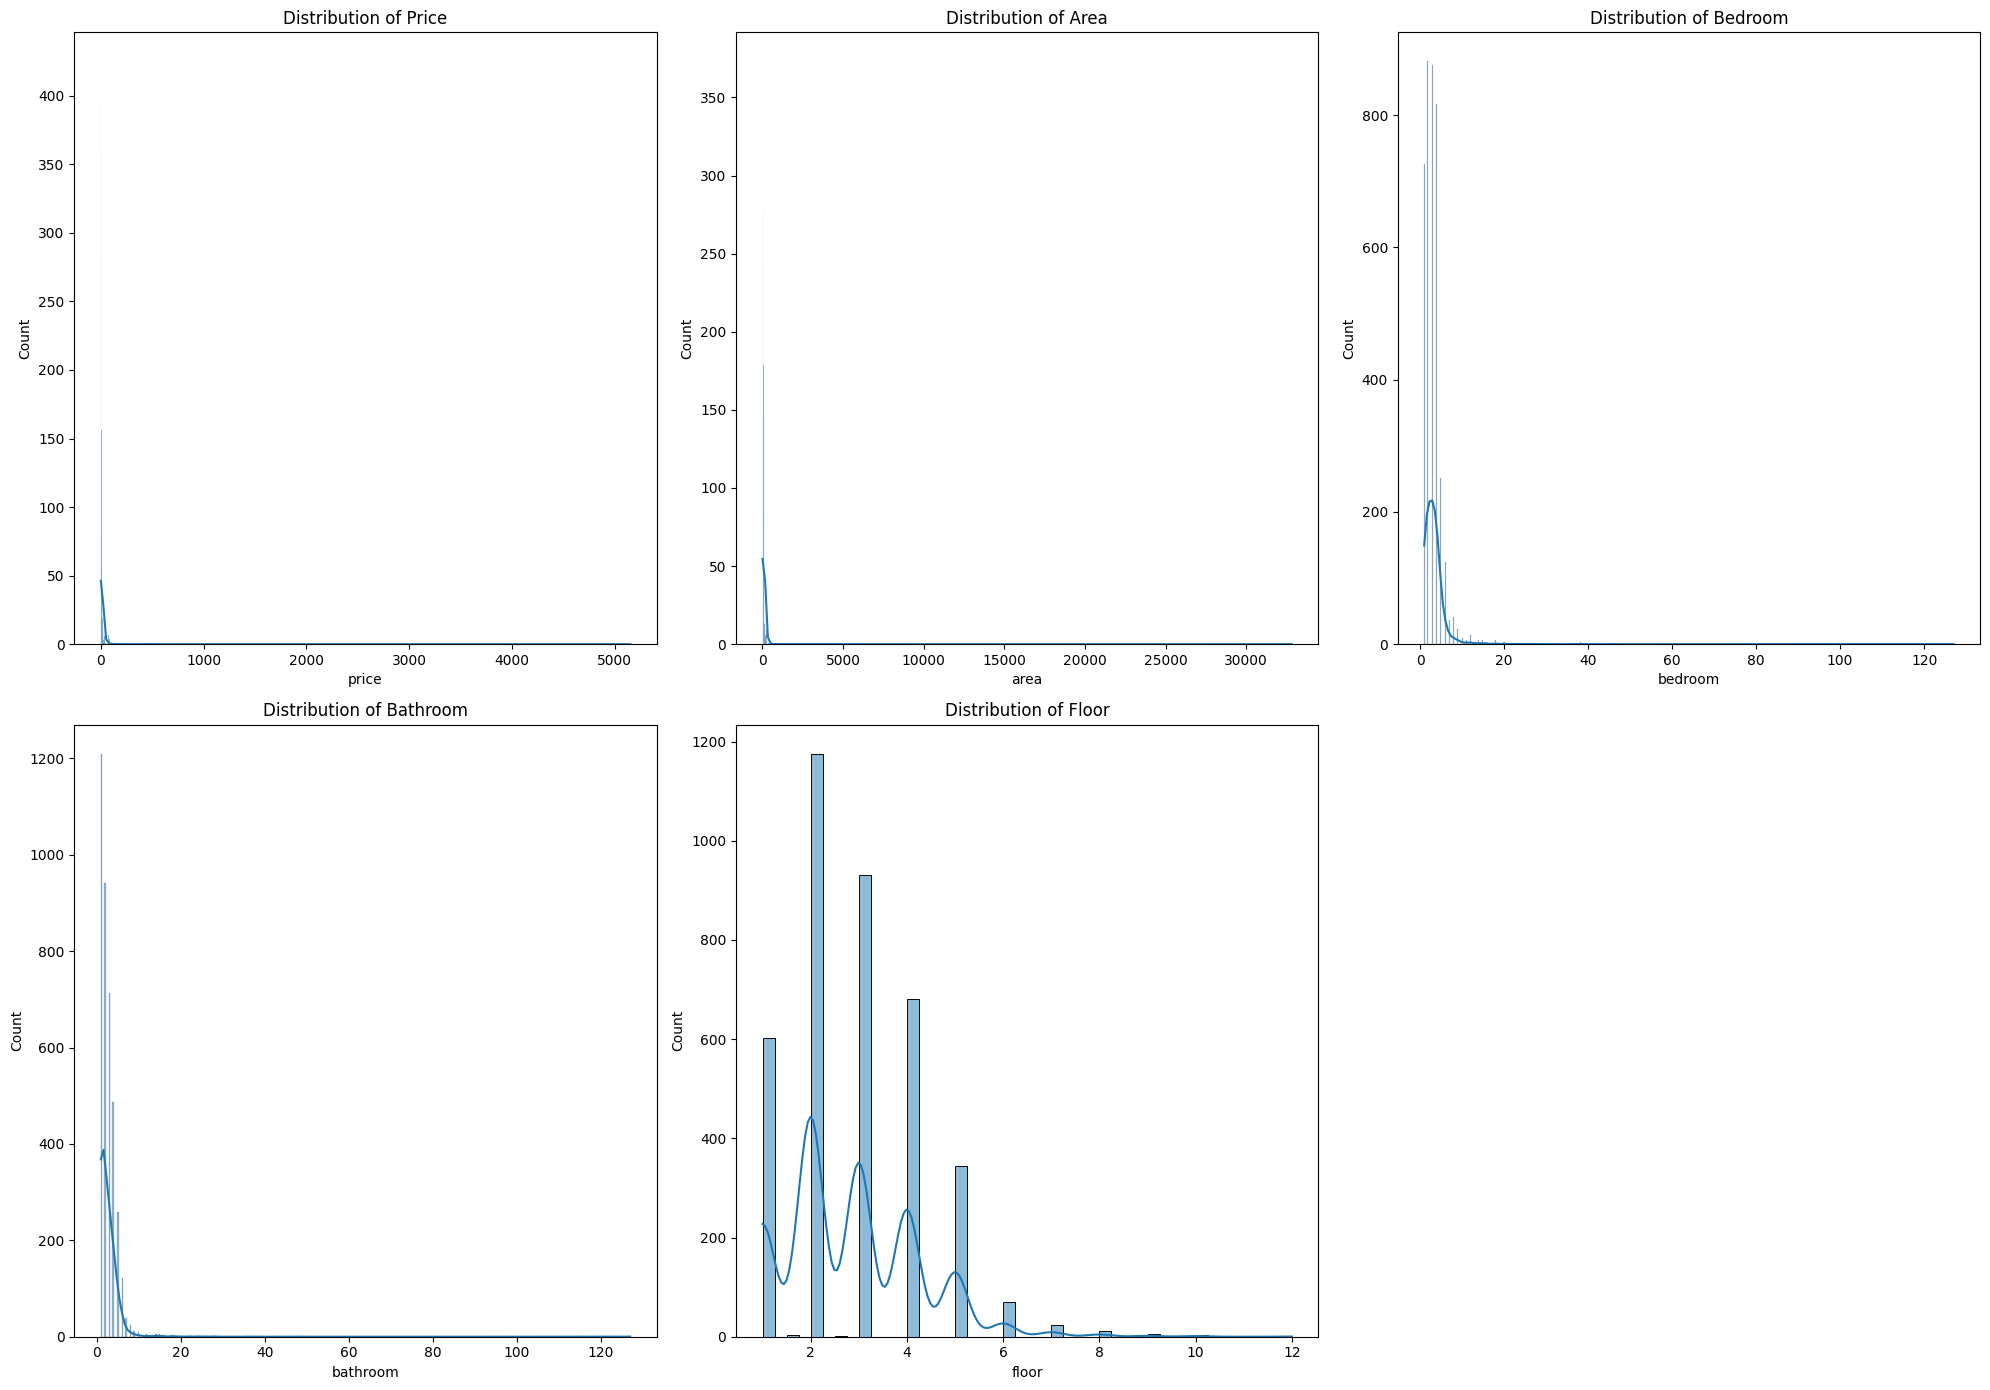

In [ ]:
# Vẽ biểu đồ phân phối của price, area, bedroom, bathroom, floor
plt.figure(figsize=(20, 14))
# Price
plt.subplot(2, 3, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')

# Area
plt.subplot(2, 3, 2)
sns.histplot(df['area'], kde=True)
plt.title('Distribution of Area')

#Bedroom
plt.subplot(2, 3, 3)
sns.histplot(df['bedroom'], kde=True)
plt.title('Distribution of Bedroom')

#Bathroom
plt.subplot(2, 3, 4)
sns.histplot(df['bathroom'], kde=True)
plt.title('Distribution of Bathroom')

#Floor
plt.subplot(2, 3, 5)
sns.histplot(df['floor'], kde=True)
plt.title('Distribution of Floor')

plt.tight_layout()
plt.show()

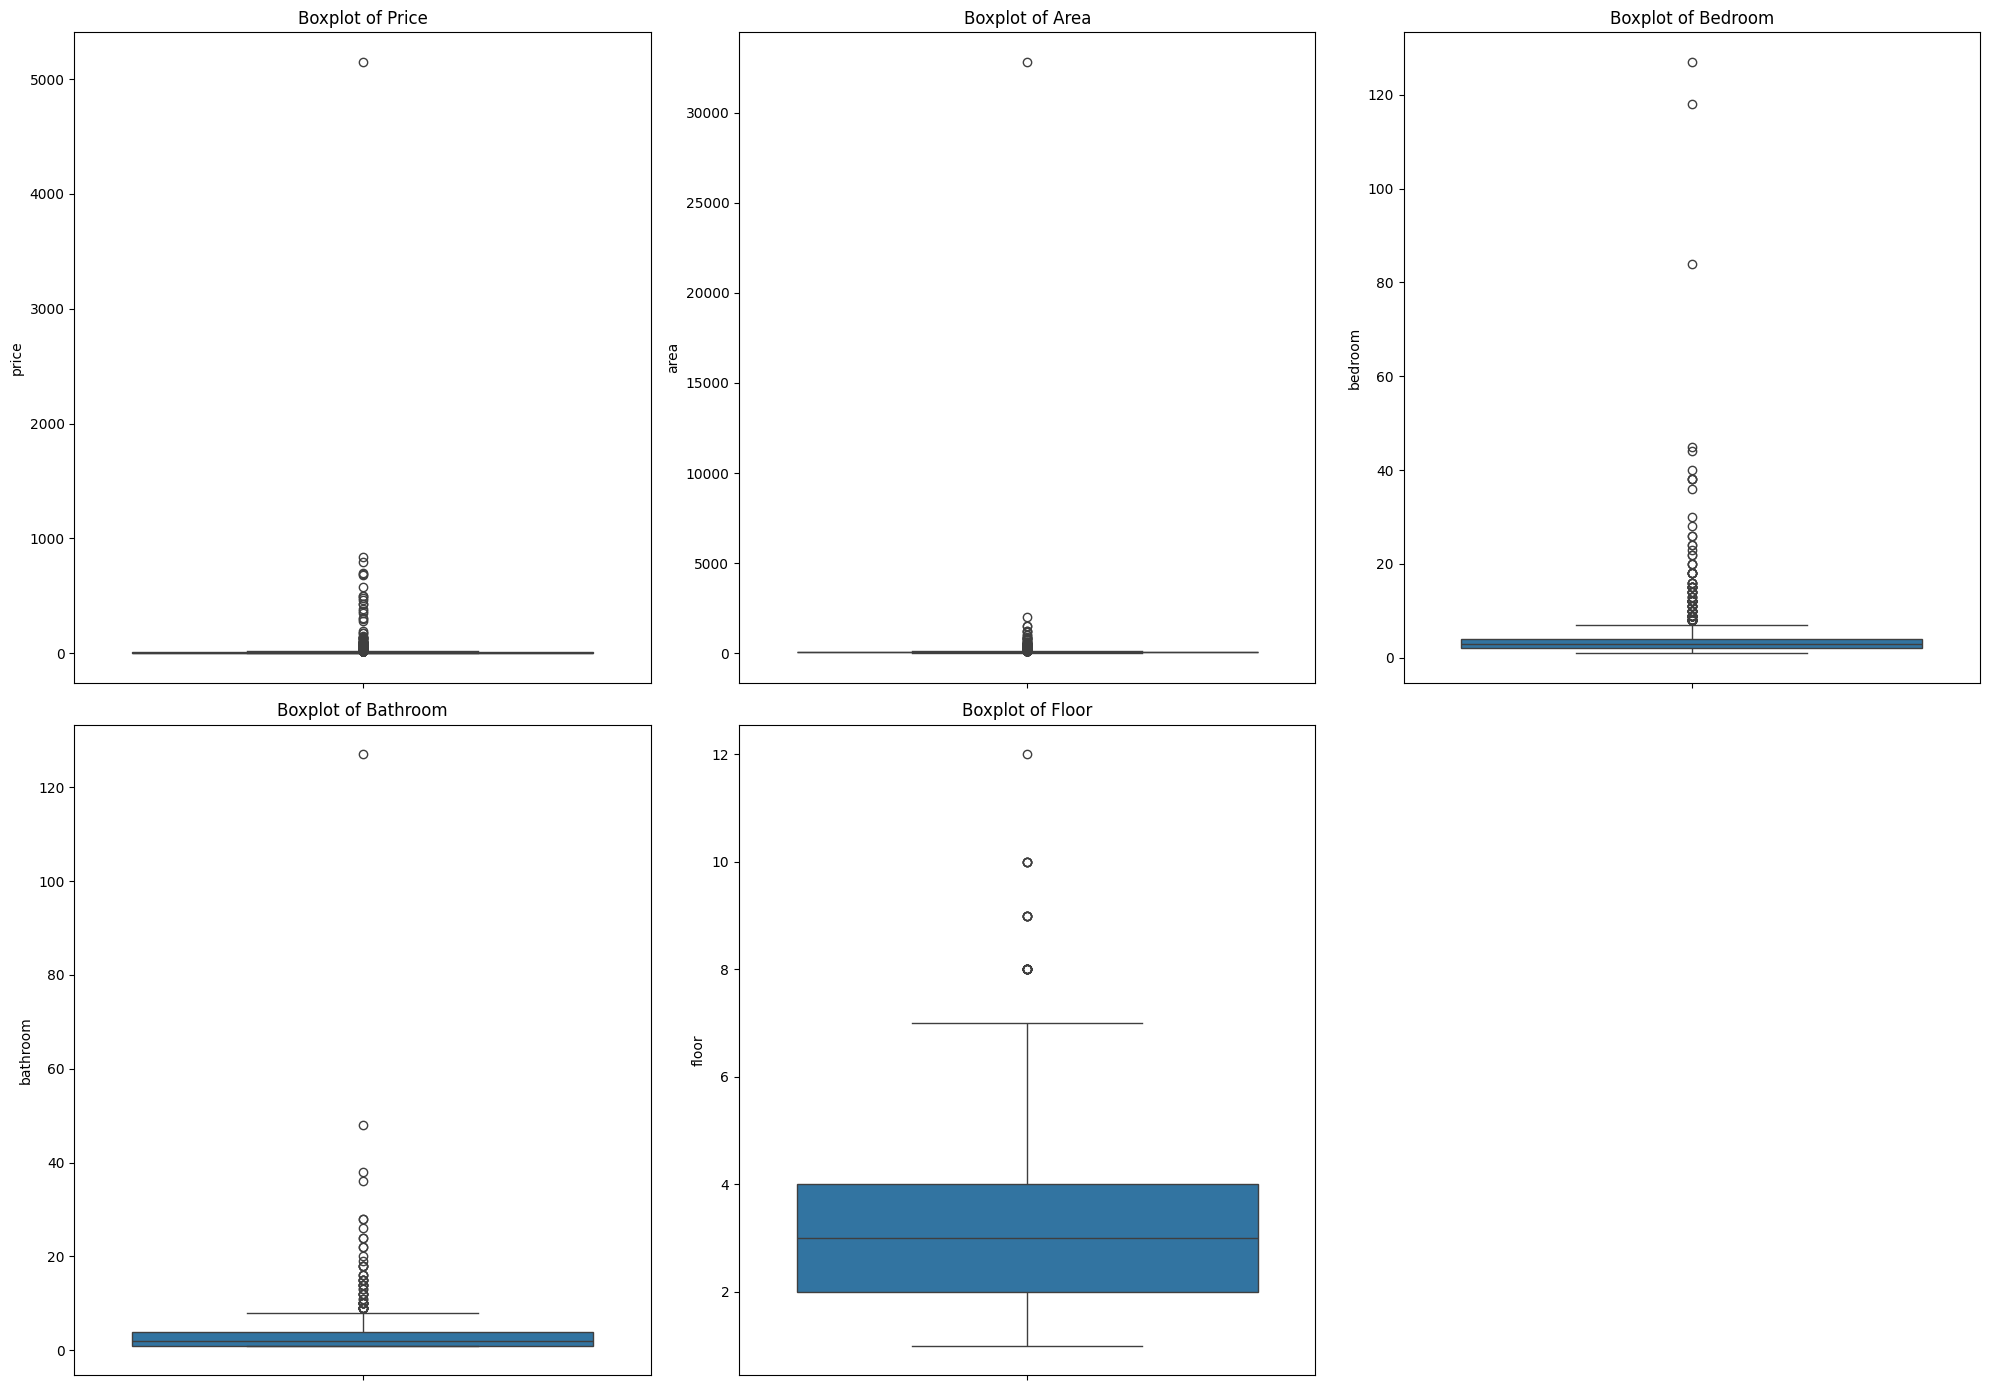

In [ ]:
# Do có các điểm ngoại lai xuất hiện dẫn đến việc biểu đồ phân phối không được đều và đẹp
# Vẽ boxplots để tìm ngoại lai
plt.figure(figsize=(20, 14))

plt.subplot(2, 3, 1)
sns.boxplot(y=df['price'])
plt.title('Boxplot of Price')

plt.subplot(2, 3, 2)
sns.boxplot(y=df['area'])
plt.title('Boxplot of Area')

plt.subplot(2, 3, 3)
sns.boxplot(y=df['bedroom'])
plt.title('Boxplot of Bedroom')

plt.subplot(2, 3, 4)
sns.boxplot(y=df['bathroom'])
plt.title('Boxplot of Bathroom')

plt.subplot(2, 3, 5)
sns.boxplot(y=df['floor'])
plt.title('Boxplot of Floor')

plt.tight_layout()
plt.show()

In [ ]:
# Hàm phát hiện các điểm ngoại lai và trả về index của nó theo từng đặc trưng
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.index

# Phát hiện ngoại lai
outlier_indices = []
for column in ['price', 'area', 'bedroom', 'bathroom', 'floor']:
    outlier_indices.extend(detect_outliers(df, column))

# Bỏ các điểm ngoại lai dựa trên index phát hiện
df_cleaned = df.drop(index=set(outlier_indices))
df_cleaned.reset_index(drop=True, inplace=True)

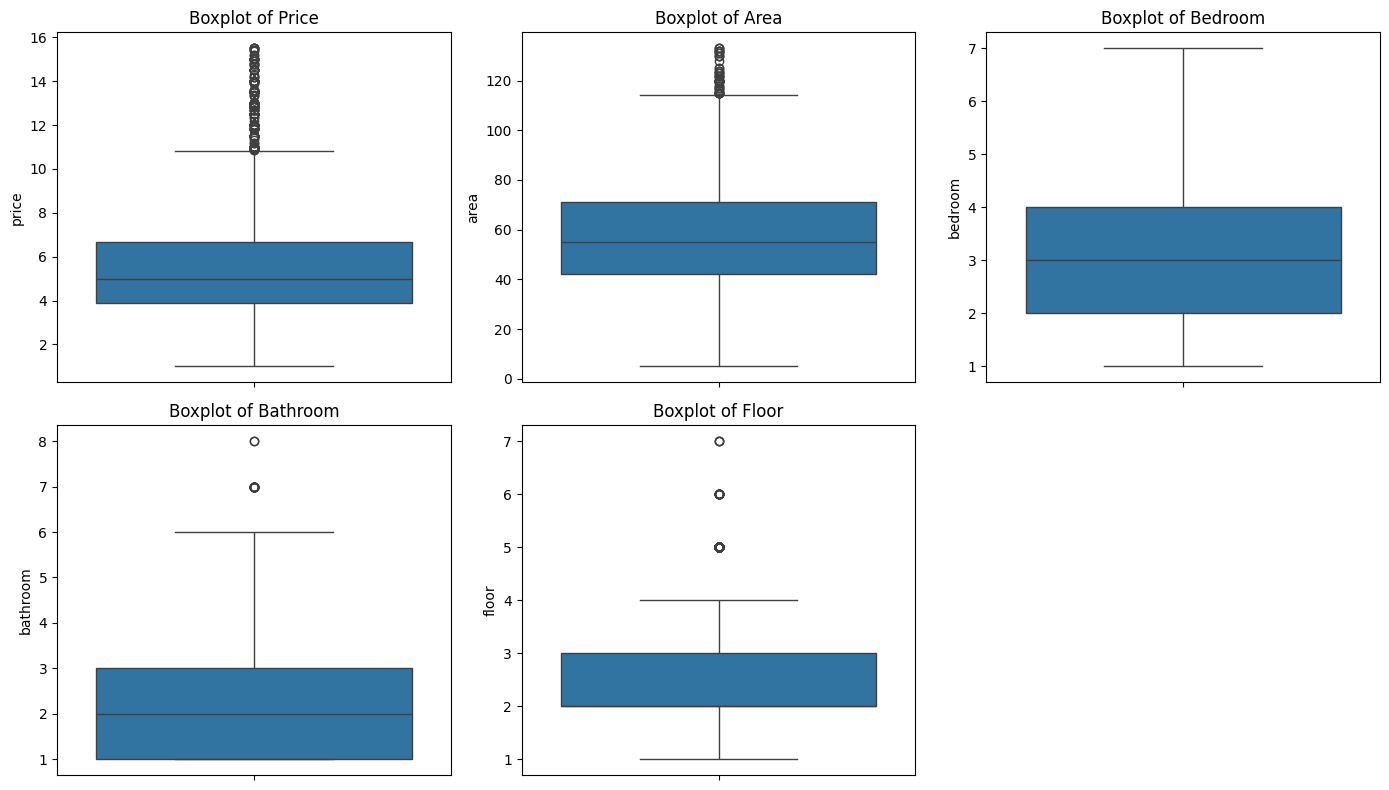

In [ ]:
# Vẽ lại boxplot sau khi bỏ ngoại lai
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
sns.boxplot(y=df_cleaned['price'])
plt.title('Boxplot of Price')

plt.subplot(2, 3, 2)
sns.boxplot(y=df_cleaned['area'])
plt.title('Boxplot of Area')

plt.subplot(2, 3, 3)
sns.boxplot(y=df_cleaned['bedroom'])
plt.title('Boxplot of Bedroom')

plt.subplot(2, 3, 4)
sns.boxplot(y=df_cleaned['bathroom'])
plt.title('Boxplot of Bathroom')

plt.subplot(2, 3, 5)
sns.boxplot(y=df_cleaned['floor'])
plt.title('Boxplot of Floor')

plt.tight_layout()
plt.show()

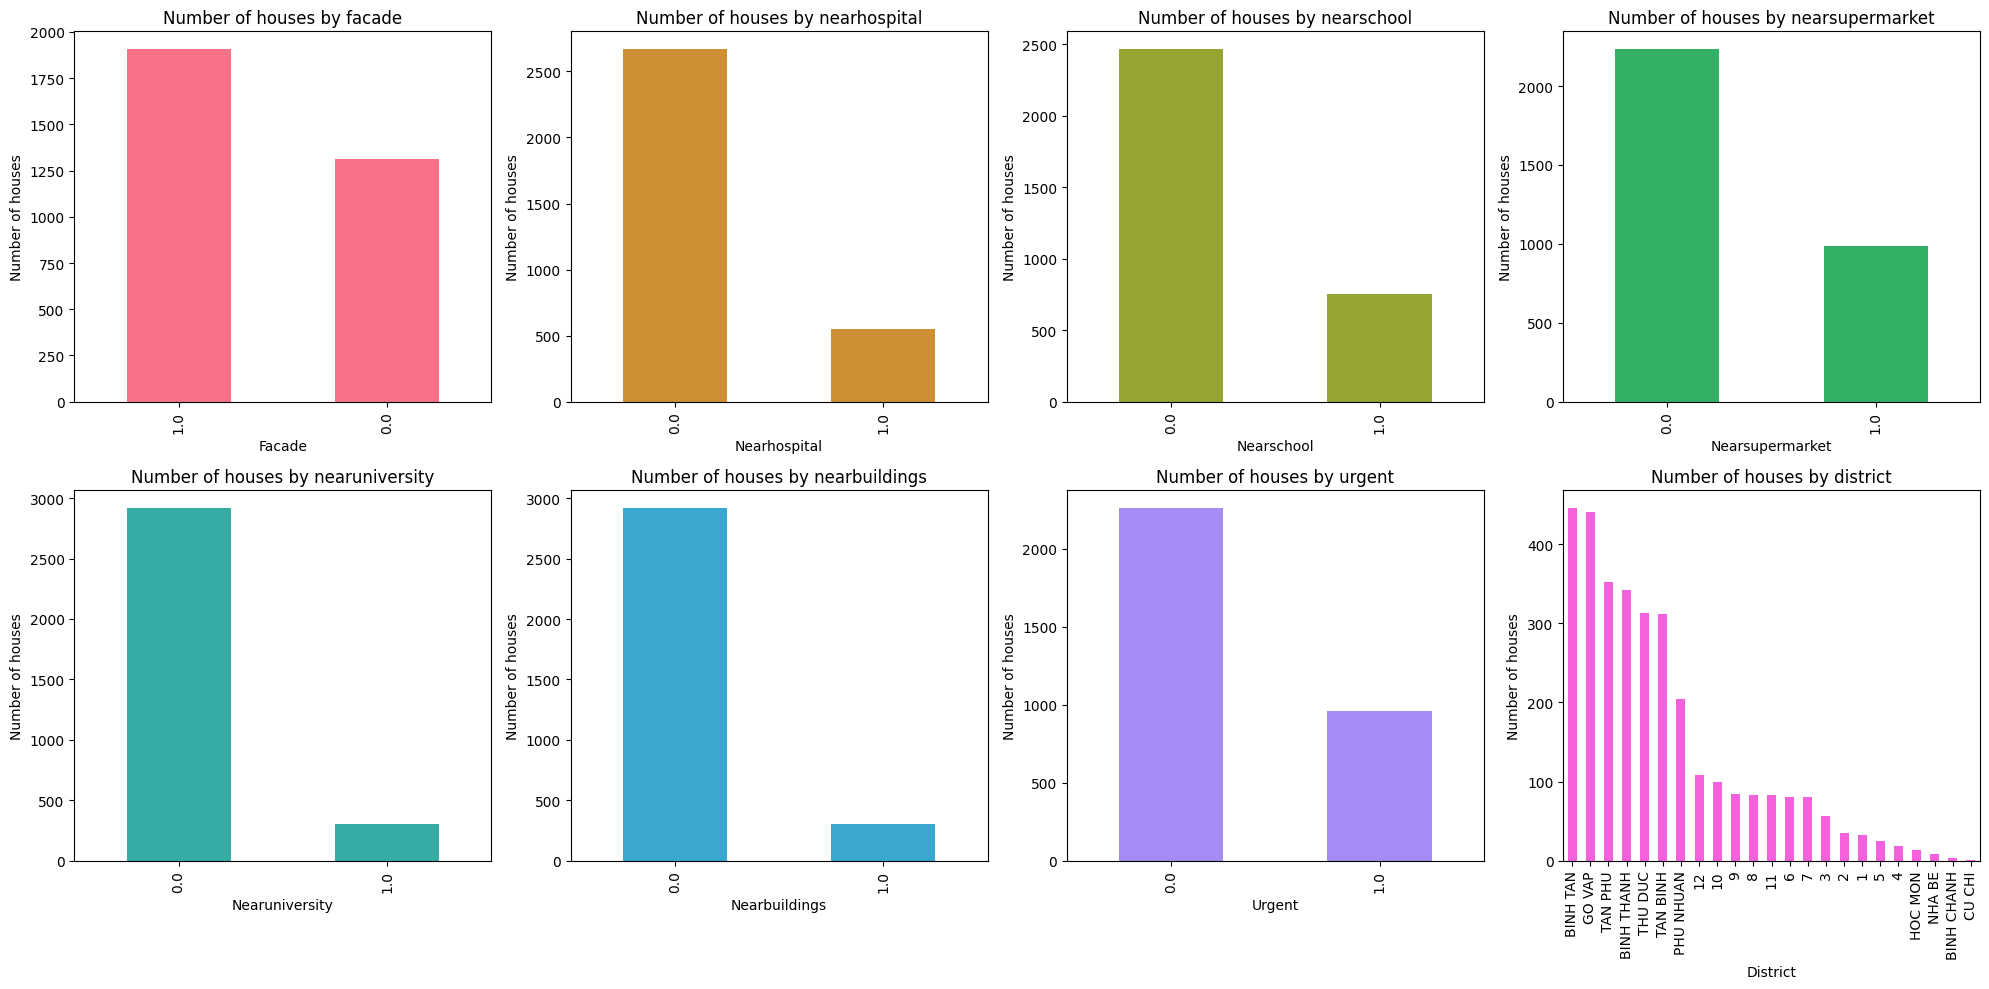

In [ ]:
#Histogram đề cập đến tần suất xuất hiện của các biến trong một khoảng, áp dụng Histogram cho các biến phân loại
# Các đặc trưng để vẽ histogram
features = ['facade', 'nearhospital', 'nearschool', 'nearsupermarket', 'nearuniversity', 'nearbuildings', 'urgent', 'district']
colors = sns.color_palette("husl", len(features))

# Trực quan hóa
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.tight_layout(pad=5.0)
axes = axes.flatten()

for i, feature in enumerate(features):
    df_cleaned[feature].value_counts().nlargest(25).plot(kind='bar', ax=axes[i], color=colors[i])
    axes[i].set_title(f"Number of houses by {feature}")
    axes[i].set_ylabel('Number of houses')
    axes[i].set_xlabel(feature.capitalize())

plt.tight_layout()
plt.show()


<Axes: >

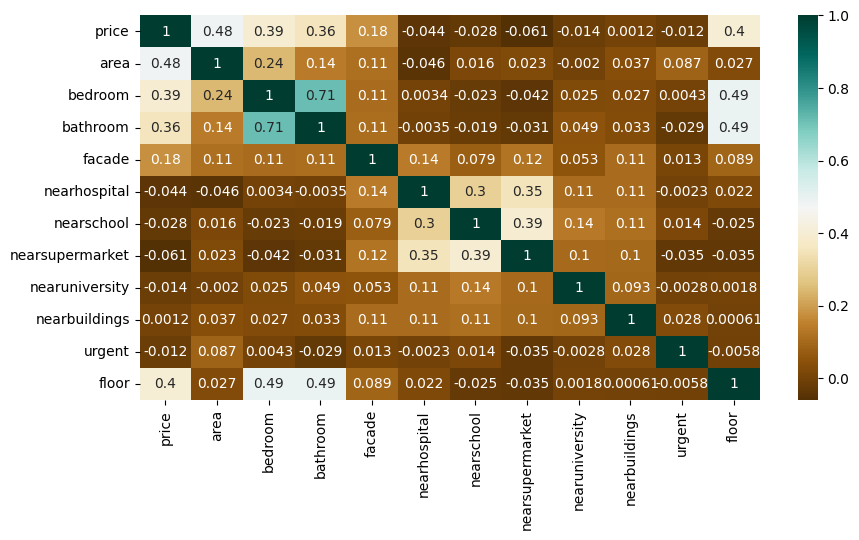

In [ ]:
#tìm mối quan hệ giữa các đặc trưng là sử dụng heat maps (không tính district)
plt.figure(figsize=(10,5))
df_noDistrict = df_cleaned.drop('district', axis=1)
c= df_noDistrict.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

<ipython-input-114-0abaf79ea5f6>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(features))  # Get a color map with enough colors


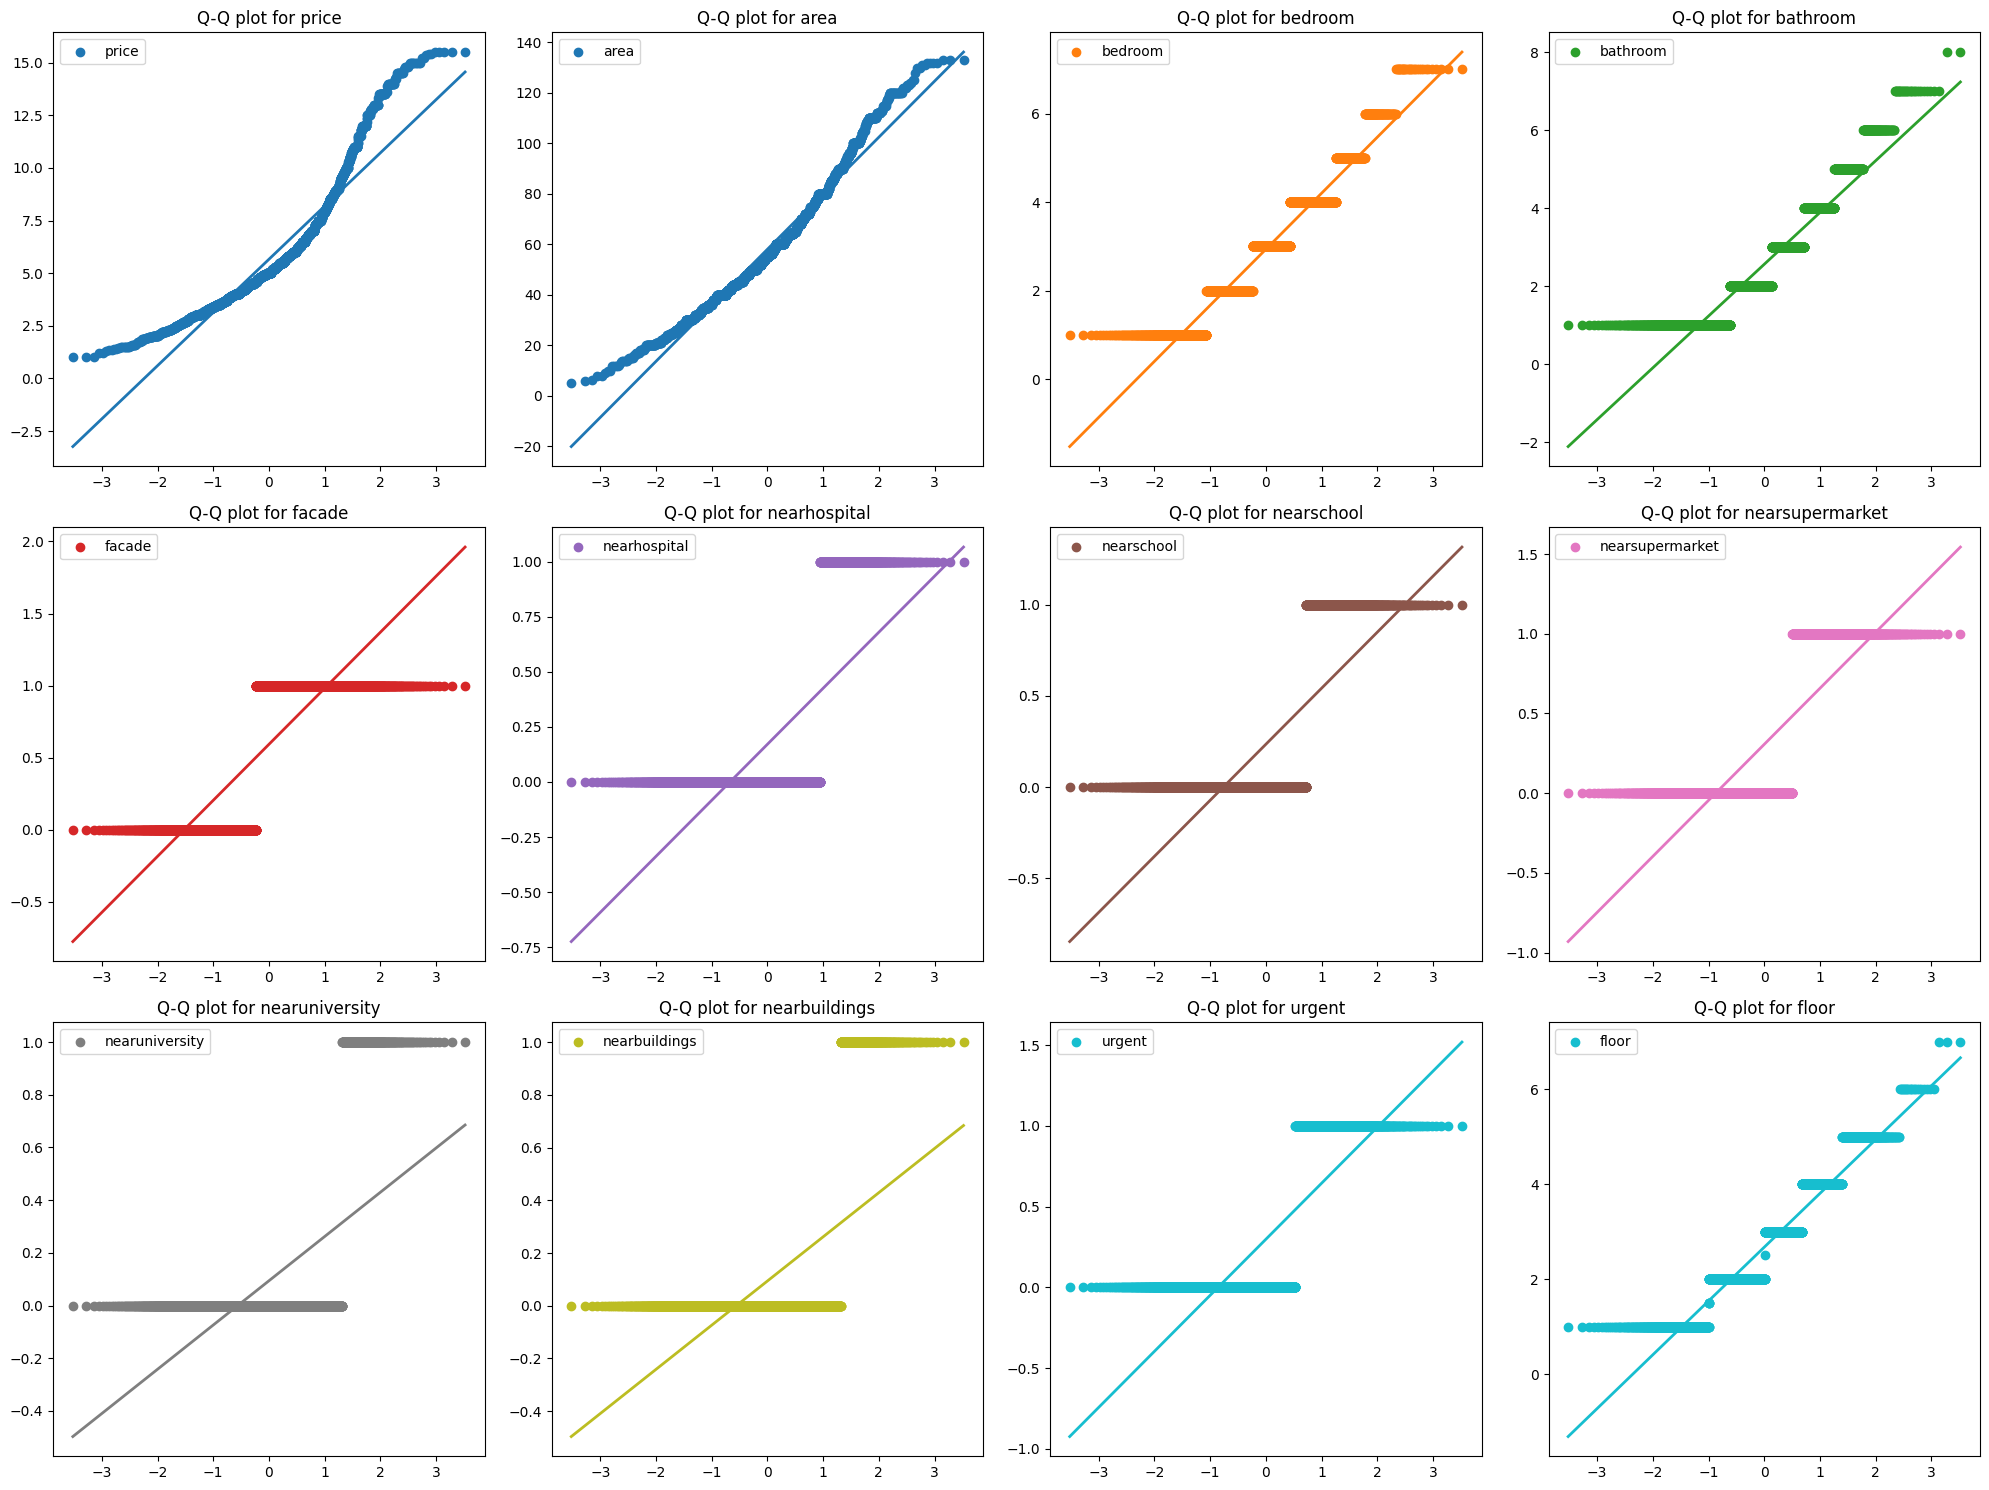

In [ ]:
import scipy.stats as stats
# List of features
features = df_noDistrict.columns.tolist()
colors = plt.cm.get_cmap('tab10', len(features))  # Get a color map with enough colors

n_features = len(features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.tight_layout(pad=5.0)

axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    res = stats.probplot(df_noDistrict[feature], dist="norm")
    qq = res[0]
    line = res[1]

    # Plot the points
    ax.scatter(qq[0], qq[1], color=colors(i), label=feature)

    # Plot the line
    ax.plot(qq[0], line[1] + line[0] * qq[0], color=colors(i), lw=2)

    ax.set_title(f"Q-Q plot for {feature}")
    ax.legend()

# Remove extra subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

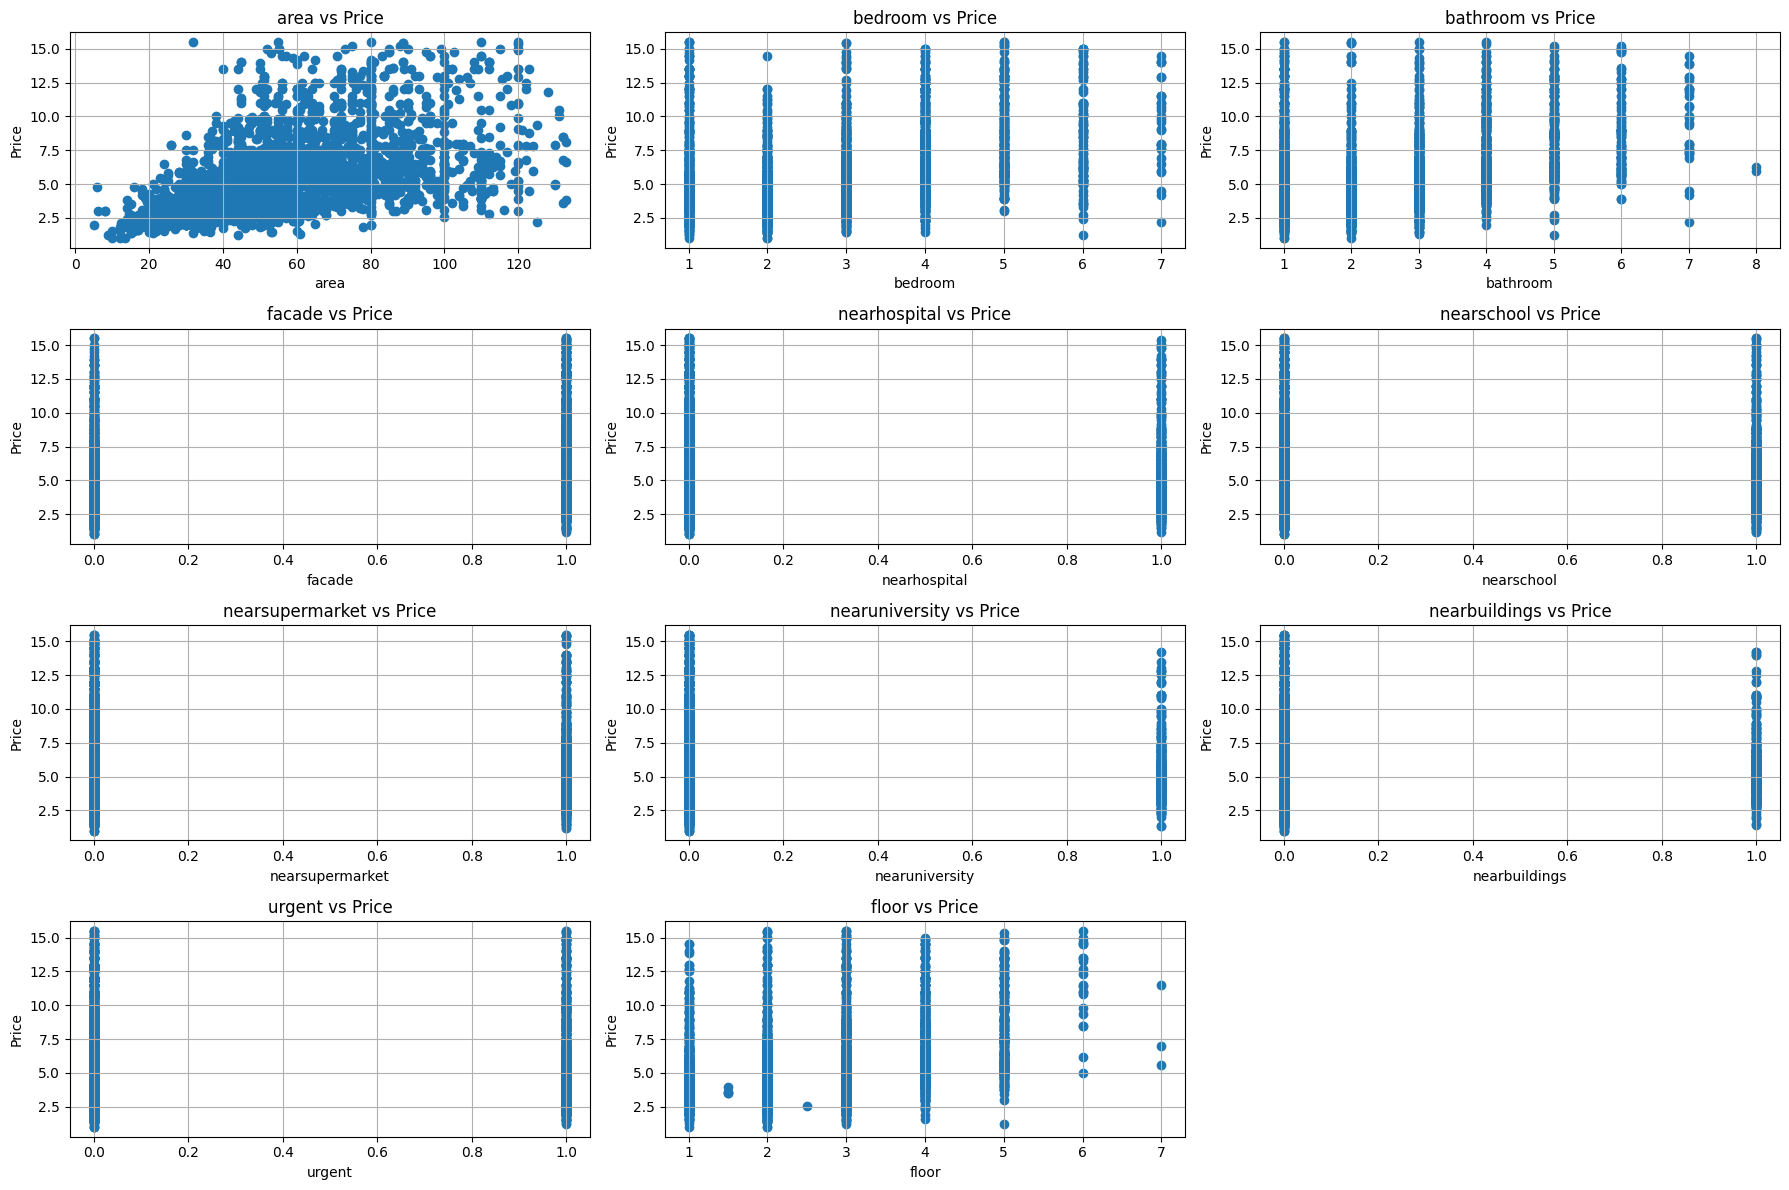

In [ ]:
# List of features to analyze (exclude 'Price')
features_to_analyse = [col for col in df_noDistrict.columns if col != 'price']

# Calculate number of rows and columns for subplots
n_cols = 3
n_rows = (len(features_to_analyse) + n_cols - 1) // n_cols

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

# Loop over each feature and plot scatter plot
for i, feature in enumerate(features_to_analyse):
    ax = axes[i]
    ax.scatter(df_noDistrict[feature], df_noDistrict['price'])
    ax.set_title(f'{feature} vs Price')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')
    ax.grid(True)

# Remove any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout and show plot
fig.tight_layout()
plt.show()


In [ ]:
# Để thể hiện sự khác nhau giá bán trên mỗi quận khác nhau, tạo thêm một thuộc tính giá đất trung bình của mỗi quận
# Tạo một cột có tên là 'land_price' để lưu giá đất của mỗi căn nhà
df_cleaned['land_price'] = df_cleaned['price']/df_cleaned['area']
# Tạo một cột mới có tên là 'mean_land_price_of_district' để tính trung bình giá đất trong mỗi Quận
df_cleaned['mean_land_price_of_district'] = df_cleaned.groupby('district')['land_price'].transform('mean')

In [ ]:
value_count=df_cleaned['district'].value_counts()

In [ ]:
m_estimate=2
for district in df_cleaned['district'].unique():
  weight=value_count[district]/(value_count[district]+m_estimate)
  for i,value in enumerate(df_cleaned['district']):
    if value==district:
      df_cleaned.loc[i,'mean_land_price_of_district']= df_cleaned.loc[i,'mean_land_price_of_district']*weight +(1-weight)*df_cleaned['land_price'].mean()


In [ ]:
df_cleaned[['land_price','district','mean_land_price_of_district']].head(20)

,land_price,district,mean_land_price_of_district
0,0.107843,TAN BINH,0.114815
1,0.102222,PHU NHUAN,0.135307
2,0.179268,5,0.160583
3,0.052083,TAN PHU,0.096952
4,0.121212,BINH THANH,0.116876
5,0.170667,4,0.147780
6,0.030909,8,0.113797
7,0.083333,7,0.106665
8,0.105765,TAN PHU,0.096952
9,0.139434,GO VAP,0.108519


In [ ]:
# tạo biến tạm
k=df_cleaned[['district','mean_land_price_of_district']]

In [ ]:
k=k.drop_duplicates(subset='district',keep='first') # Xóa dữ liệu bị trùng lặp
k=k.sort_values(by='mean_land_price_of_district',ascending=True)  # Sắp xếp theo giá trị trung bình giảm dần

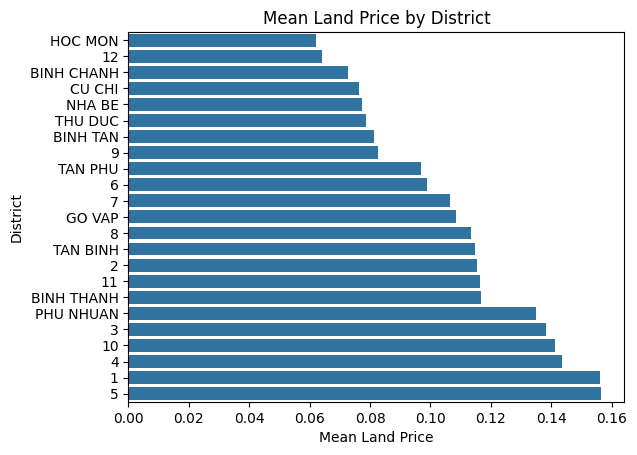

In [ ]:
# vẽ biểu đồ cột nằm ngang giữa 'mean_land_price_of_district' và 'district'
sns.barplot(x='mean_land_price_of_district', y='district', data=k)
plt.xlabel('Mean Land Price')
plt.ylabel('District')
plt.title('Mean Land Price by District')
plt.show()

In [ ]:
# Nhận thấy do hệ số tương quan giữa các feature 'nearhospital', 'nearschool', 'nearsupermarket', 'nearuniversity', 'nearbuildings' rất thấp và không có sự liên kết với nhau do là biến phân loại
# nên ta sẽ cộng giá trị các thuộc tính này lại thành một thuộc tính mới
# Tạo thuộc tính  'facility' là tổng của các thuộc tính 'nearhospital', 'nearschool', 'nearsupermarket', 'nearuniversity', 'nearbuildings'
tf_features = ['nearhospital', 'nearschool', 'nearsupermarket', 'nearuniversity', 'nearbuildings']
df_cleaned['facility'] = df_cleaned[tf_features].sum(axis = 1)

In [ ]:
from scipy import stats


prices_urgent_true = np.array(list(df_cleaned['price'][i] for i,value in enumerate(df_cleaned['urgent']) if value==1))
prices_urgent_false = np.array(list(df_cleaned['price'][i] for i,value in enumerate(df_cleaned['urgent']) if value==0))

t_statistic, p_value = stats.ttest_ind(prices_urgent_true, prices_urgent_false)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - The average house prices are significantly different between the two groups.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference in the average house prices between the two groups.")
# Vậy ta sẽ bỏ thuộc tính 'urgent' vì không có sự ảnh hưởng đáng kể đến giá bán

T-statistic: -0.6962296094126307
P-value: 0.4863352980531208
Fail to reject the null hypothesis - There is no significant difference in the average house prices between the two groups.


In [ ]:
prices_facade_true = np.array(list(df_cleaned['price'][i] for i,value in enumerate(df_cleaned['facade']) if value==1))  # Replace with actual prices where urgent is true
prices_facade_false = np.array(list(df_cleaned['price'][i] for i,value in enumerate(df_cleaned['facade']) if value==0))  # Replace with actual prices where urgent is false

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(prices_facade_true, prices_facade_false)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation of the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis - The average house prices are significantly different between the two groups.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference in the average house prices between the two groups.")

T-statistic: 10.132046184533687
P-value: 9.01340383057597e-24
Reject the null hypothesis - The average house prices are significantly different between the two groups.


In [ ]:
# Bỏ các thuộc tính 'nearhospital','nearschool', 'nearsupermarket', 'nearuniversity', 'nearbuildings', 'urgent', 'land_price'
df_new = df_cleaned.drop(columns=['nearhospital','nearschool', 'nearsupermarket', 'nearuniversity', 'nearbuildings', 'urgent', 'land_price'])

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        3222 non-null   float64
 1   area                         3222 non-null   float64
 2   bedroom                      3222 non-null   float64
 3   bathroom                     3222 non-null   float64
 4   facade                       3222 non-null   float64
 5   floor                        3222 non-null   float64
 6   district                     3222 non-null   object 
 7   mean_land_price_of_district  3222 non-null   float64
 8   facility                     3222 non-null   float64
dtypes: float64(8), object(1)
memory usage: 226.7+ KB


<Axes: >

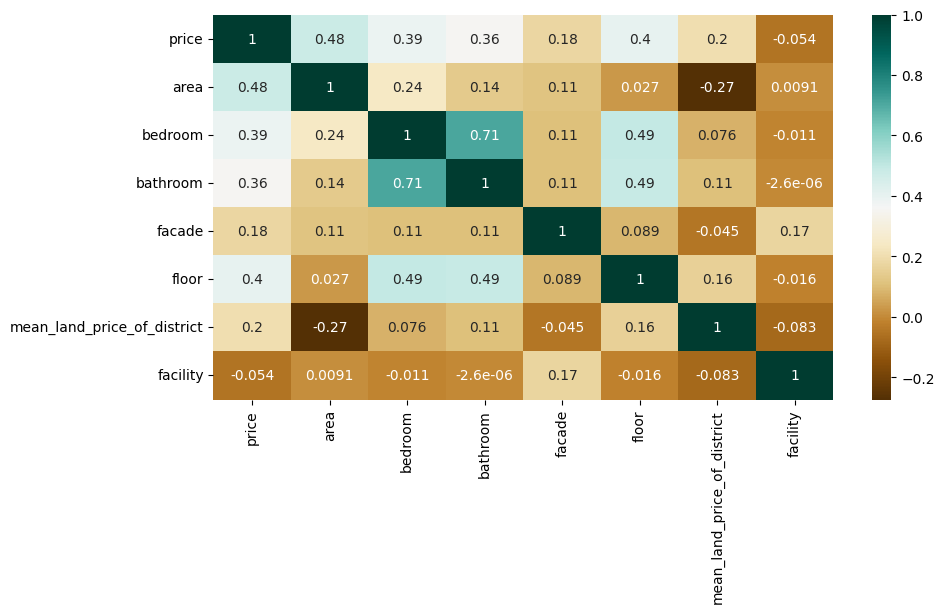

In [ ]:
#Vẽ lại mối quan hệ giữa các đặc trưng là sử dụng heat maps (không tính district)
plt.figure(figsize=(10,5))
df_noDistrict = df_new.drop('district', axis=1)
c= df_noDistrict.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
# Không xóa facility bởi vì thực tế, những cơ sở vật chất cũng có ảnh hưởng nhỏ đến với quyết định mua nhà

In [ ]:
df_new.to_csv('data_for_model.csv',index=False)